In [71]:
#Import

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

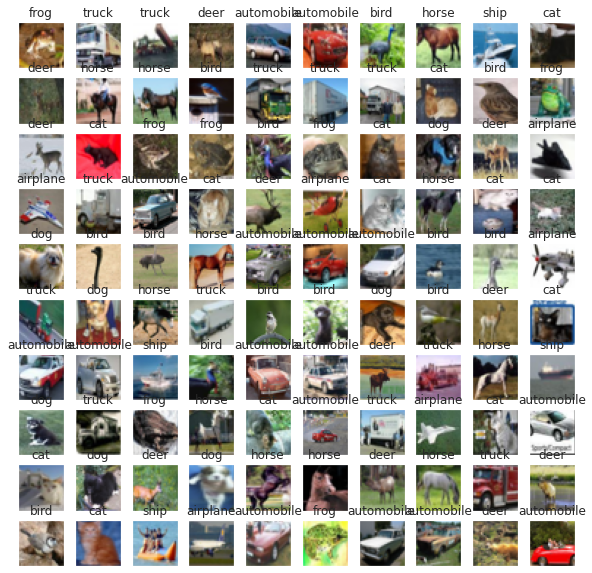

In [72]:
# Loading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Display the first 100 images of X_train
fig, axes = plt.subplots(ncols=10, nrows=10, figsize=(10, 10))
index = 0
for i in range(10):
    for j in range(10):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [73]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# Value normalization
X_train  = X_train/255
X_test  = X_test/255

X_train = cv2.flip(X_train,1)
'''sharpening = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
X_train = cv2.filter2D(X_train, -1,sharpening)'''

X_test = cv2.flip(X_test,1)
'''sharpening = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
X_test = cv2.filter2D(X_test, -1,sharpening)'''

# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)


In [74]:
# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [75]:
# Constructing CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [76]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)


# Model training
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7040 - acc: 0.3714 - val_loss: 1.3599 - val_acc: 0.5166
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2711 - acc: 0.5511 - val_loss: 1.0678 - val_acc: 0.6202
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0643 - acc: 0.6290 - val_loss: 0.9588 - val_acc: 0.6682
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9373 - acc: 0.6752 - val_loss: 0.9206 - val_acc: 0.6807
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8575 - acc: 0.7048 - val_loss: 0.8616 - val_acc: 0.7049
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7847 - acc: 0.7295 - val_loss: 0.8388 - val_acc: 0.7125
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7320 - acc: 0.7454 - val_loss: 0.8237 - val_acc: 0.7250
Epoch 8/20
1563/1563 [==============================] - 9s 6ms

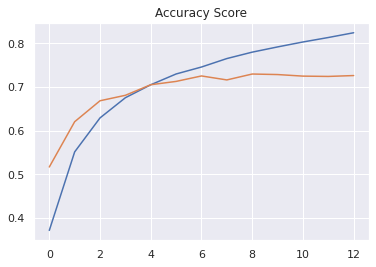

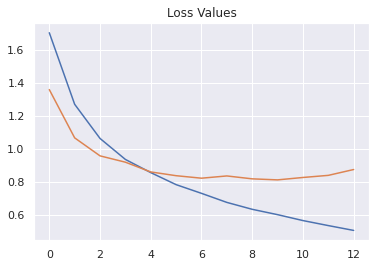

In [77]:
# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

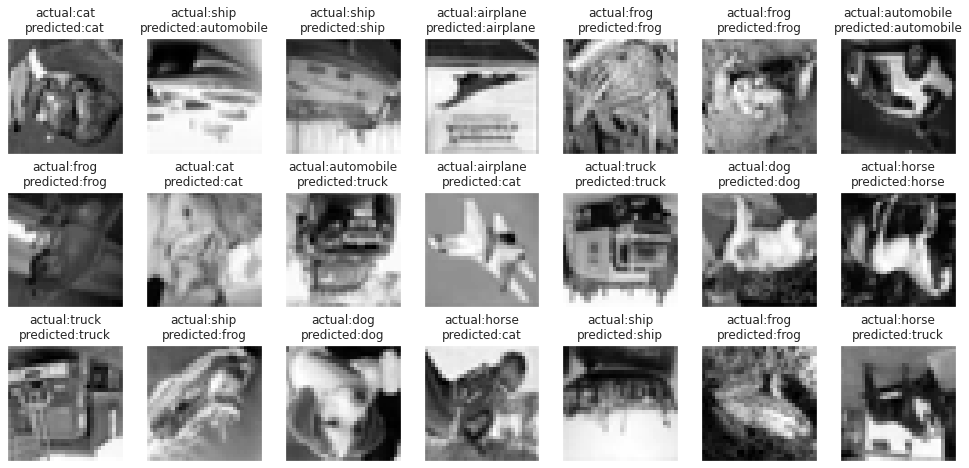

In [78]:


predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

# Displaying test data with its actual and predicted label
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()